In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import os
import numpy as np

In [21]:
Basic_dir = os.path.dirname(os.path.dirname(os.path.realpath('EDA.ipynb')))
PATH = Basic_dir + '\\Data\\Data(HeartD_B)'
os.listdir(PATH)

['sample_submission(DT).csv',
 'sample_submission(KNN).csv',
 'sample_submission(LR).csv',
 'sample_submission(LR_PCA7).csv',
 'sample_submission(LR_slope&ageET).csv',
 'sample_submission(LR_slopeET).csv',
 'sample_submission(NB).csv',
 'sample_submission(NT).csv',
 'sample_submission(SVM).csv',
 'sample_submission(SVM_slope&ageET).csv',
 'sample_submission(SVM_slopeET).csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [22]:
# 결측값 없음 / 15개의 열과 151개의 행으로 이루어진 데이터 구조
df_train = pd.read_csv(PATH + '\\train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


In [23]:
# 데이터의 형태확인
df_train.dtypes

id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [24]:
# 데이터에 대한 간략한 설명(DACON 제공)
# id: 데이터 고유 id
# age: 나이 
# sex: 성별 (여자 = 0, 남자 = 1) 
# cp: 가슴 통증(chest pain) 종류 
# 0 : asymptomatic 무증상 / 1 : atypical angina 일반적이지 않은 협심증
# 2 : non-anginal pain 협심증이 아닌 통증 / 3 : typical angina 일반적인 협심증
# trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
# chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
# fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
# restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
# 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
# 1: 정상
# 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# thalach: (maximum heart rate achieved) 최대 심박수
# exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
# oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
# slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
# 0: downsloping 하강 / 1: flat 평탄 / 2: upsloping 상승
# ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
# Null 값은 숫자 4로 인코딩됨 
# thal: thalassemia 지중해빈혈 여부
# 0 = Null 
# 1 = normal 정상
# 2 = fixed defect 고정 결함
# 3 = reversable defect 가역 결함
# target: 심장 질환 진단 여부
# 0: < 50% diameter narrowing
# 1: > 50% diameter narrowing
# 불필요한 컬럼삭제(id)
df_train = df_train.iloc[:, 1:]
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [25]:
# 타겟 변수의 균형성 확인(83 : 68 - 균형적)
df_train.target.value_counts()

1    83
0    68
Name: target, dtype: int64

In [26]:
# 연령층을 범위 단위로 변환
df_train['age_gr'] = np.where(df_train.age < 20, 10, 
                     np.where(df_train.age < 30, 20, 
                     np.where(df_train.age < 40, 30, 
                     np.where(df_train.age < 50, 40,
                     np.where(df_train.age < 60, 50,
                     np.where(df_train.age < 70, 60, 70))))))
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_gr
0,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1,50
1,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1,50
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,50
3,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1,40
4,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1,30


In [27]:
# 상관계수 분석을 위한 연속형 변수 컬럼명 설정
val_list1 = ['trestbps', 'chol', 'thalach', 'oldpeak', 'slope','ca', 'target']
val_list2 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'age_gr']
# sex : 명목 / cp : 명목 / fbs : 순위 변수 / restecg : 순위 변수 / exang : 명목 / thal : 명목 
# ca열의 값중 4는 null 값이므로 제거 -> 4를 값으로 가지는 행 없음.
df_train_eda01 = df_train[val_list1]
df_train_eda01.corr()

,trestbps,chol,thalach,oldpeak,slope,ca,target
trestbps,1.000000,0.187539,-0.037929,0.129670,-0.039470,0.078736,-0.122850
chol,0.187539,1.000000,0.109218,0.096622,0.091094,0.049526,0.036991
thalach,-0.037929,0.109218,1.000000,-0.334791,0.267636,-0.203291,0.365249
oldpeak,0.129670,0.096622,-0.334791,1.000000,-0.564554,0.194849,-0.421514
slope,-0.039470,0.091094,0.267636,-0.564554,1.000000,0.018723,0.305994
ca,0.078736,0.049526,-0.203291,0.194849,0.018723,1.000000,-0.466289
target,-0.122850,0.036991,0.365249,-0.421514,0.305994,-0.466289,1.000000


<AxesSubplot:title={'center':'corr score'}>

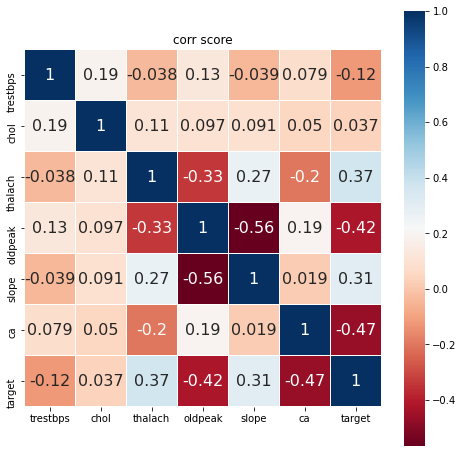

In [28]:
# target을 연속형 변수로 보았을 때
# 상관계수를 시각화 및 상관계수 값이 높은 변수들 확인
# ca와 oldpeak의 경우 target변수와의 연관성이 높지만 thalach와의 연관성도 높은 것을 확인
# 해당 변수들을 모두 그대로 반영하여 분석을 진행하면 중복적인 가중치가 적용될 수 있음.
colormap = plt.cm.RdBu
plt.figure(figsize = (8, 8))
plt.title('corr score')
sns.heatmap(df_train_eda01.corr(), linewidth = 0.1, vmax = 1.0, square = True, \
            cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size' : 16})

In [40]:
val_list3 = ['thalach', 'oldpeak', 'slope', 'ca', 'sex', 'cp', 'exang', 'thal', 'age_gr', 'target']
df_train_eda02 = df_train[val_list3]

In [57]:
abs(df_train_eda02.corr().target).sort_values(ascending=False).drop('target')

ca         0.466289
cp         0.436273
thal       0.428530
oldpeak    0.421514
exang      0.396145
thalach    0.365249
slope      0.305994
sex        0.246289
age_gr     0.231318
Name: target, dtype: float64

<AxesSubplot:title={'center':'corr score'}>

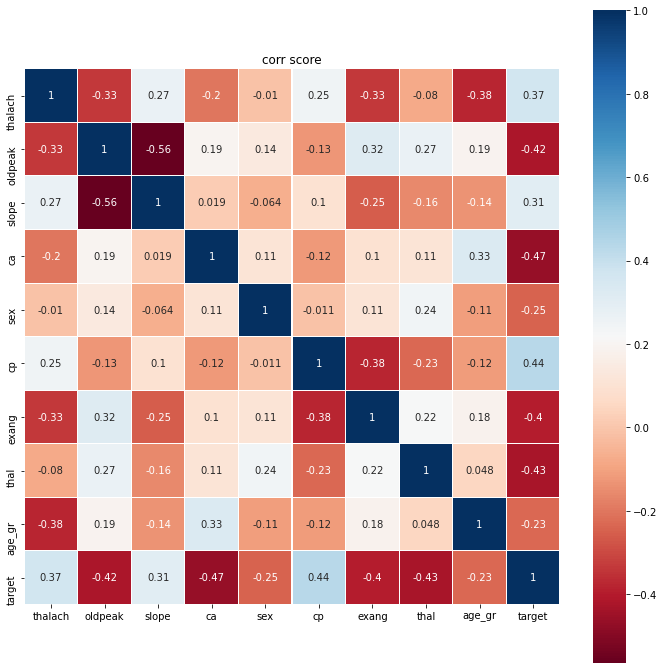

In [41]:
# 연관성이 없는 변수들 제거한 후 전체변수 시각화
colormap = plt.cm.RdBu
plt.figure(figsize = (12, 12))
plt.title('corr score')
sns.heatmap(df_train_eda02.corr(), linewidth = 0.1, vmax = 1.0, square = True, \
            cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size' : 10})
# 서로 연관성이 있는 변수들
# thalach : oldpeak, slope, exang, age_gr
# oldpeak : thalach, slope, exang, thal
# slope : oldpeak, thalach, exang
# ca : age_gr / sex : 딱히 없음
# cp : exang, thal, thalach / exang : cp, thalach, slope
# thal : age_gr, oldpeak, sex, cp, exang
# 변수로 사용한 리스트 추론 : ca, cp, thal, oldpeak, sex, age_gr

In [29]:
# target을 순위변수로 보았을때
# 스피어만 상관계수 분석 실시
from scipy import stats
x_list = []
print(val_list1)
for col in val_list1:
    if stats.spearmanr(df_train[col], df_train.target)[1] < 0.05:
        x_list.append(col)
        print(f'{col} : {round(stats.spearmanr(df_train[col], df_train.target)[0], 3)}, {round(stats.spearmanr(df_train[col], df_train.target)[1], 5)}')
# 분석결과 : trestbps, chol은 연관성이 있다고 보기 어려움. 귀무가설 기각 불가
print(x_list)

['trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target']
thalach : 0.361, 1e-05
oldpeak : -0.401, 0.0
slope : 0.333, 3e-05
ca : -0.515, 0.0
target : 1.0, 0.0
['thalach', 'oldpeak', 'slope', 'ca', 'target']


In [30]:
print(val_list2)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'age_gr']


In [31]:
df_train.age_gr.value_counts()

50    62
60    41
40    35
30     8
70     5
Name: age_gr, dtype: int64

In [32]:
# 질적 변수들을 모두 명목변수로, target을 순위 변수로 보고 연관성 테스트
# 크루스칼 왈리스 검정 실시 # 등분산성 및 정규성 검정은 미실시
import statsmodels.api as sm
from statsmodels.formula.api import ols

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - sex는 관계가 있음
print('sex:', stats.kruskal(df_train[df_train.sex == 0].target,\
              df_train[df_train.sex == 1].target))

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - cp는 관계가 있음
print('cp:', stats.kruskal(df_train[df_train.cp == 0].target, df_train[df_train.cp == 1].target,\
              df_train[df_train.cp == 2].target, df_train[df_train.cp == 3].target))

# p-value가 0.05이상이므로 귀무가설(관계가 없다)기각불가 - fbs는 관계가 없음.
print('fbs:', stats.kruskal(df_train[df_train.fbs == 0].target,\
              df_train[df_train.fbs == 1].target))

# restecg는 값이 2를 가지는 행이 1개밖에 존재하지 않음 - 추후 반영하여 분석실시
# p-value가 0.05이상이므로 귀무가설(관계가 없다)기각불가 - restecg는 관계가 없음.
print('restecg:', stats.kruskal(df_train[df_train.restecg == 0].target, df_train[df_train.restecg == 1].target,\
              df_train[df_train.restecg == 2].target))

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - exang는 관계가 있음
print('exang:', stats.kruskal(df_train[df_train.exang == 0].target,\
              df_train[df_train.exang == 1].target))

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - thal은 관계가 있음
print('thal:', stats.kruskal(df_train[df_train.thal == 0].target, df_train[df_train.thal == 1].target,\
              df_train[df_train.thal == 2].target, df_train[df_train.thal == 3].target))   

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - age_gr은 관계가 있음
print('age_gr:', stats.kruskal(df_train[df_train.age_gr == 30].target, df_train[df_train.age_gr == 40].target,\
              df_train[df_train.age_gr == 60].target, df_train[df_train.age_gr == 70].target,\
              df_train[df_train.age_gr == 70].target))               

sex: KruskalResult(statistic=9.098721771724183, pvalue=0.002557881896332576)
cp: KruskalResult(statistic=39.85442352556739, pvalue=1.1439680550296452e-08)
fbs: KruskalResult(statistic=0.6498521878156331, pvalue=0.4201655312136183)
restecg: KruskalResult(statistic=1.4613749114102992, pvalue=0.4815778128534851)
exang: KruskalResult(statistic=23.539621376544904, pvalue=1.2236770811382148e-06)
thal: KruskalResult(statistic=42.49441623346472, pvalue=3.1509554831607388e-09)
age_gr: KruskalResult(statistic=10.4161563320734, pvalue=0.033971722484134416)


In [33]:
x_list += ['sex', 'cp', 'exang', 'thal', 'age_gr']
x_list

['thalach',
 'oldpeak',
 'slope',
 'ca',
 'target',
 'sex',
 'cp',
 'exang',
 'thal',
 'age_gr']